# BAD CAR PURCHASE PREDICTION

In this machine learning project we seek to develop a prediction model that helps us to determine if a car is a bad buy or not. For this, we use all the tools that we learned on the [1] Machine Learning with Python: Zero to GBMs course and also from other sources like kaggle notebooks, youtube tutorials, etc.

We took the dataset from kaggle [2]
 (https://www.kaggle.com/competitions/DontGetKicked). 

![](https://i.imgur.com/K2o9adD.jpeg)

## Introduction

This will be the process that we are going to follow for this project:
1) Download the data and libraries
2) Perform exploratory data analysis and data cleaning
3) Perform feature engineering
4) Training a model with different techniques and choosing the best one
5) Tunning the chosen model with the best hyperparameters possible

In [ ]:
#restart the kernel after installation
!pip install pandas-profiling numpy matplotlib seaborn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 47.9 MB/s eta 0:00:00


In [ ]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install plotly.express --quiet

In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
import plotly.express as px
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the data

The dataset is available at https://www.kaggle.com/competitions/DontGetKicked/data

In [ ]:
od.download('https://www.kaggle.com/competitions/DontGetKicked/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: luiscortesp
Your Kaggle Key: ··········


100%|██████████| 10.2M/10.2M [00:00<00:00, 55.8MB/s]

Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


In [ ]:
os.listdir('DontGetKicked')

['training.zip',
 'test.csv',
 'test.zip',
 'Carvana_Data_Dictionary.txt',
 'training.csv',
 'example_entry.csv']

In [ ]:
train_df = pd.read_csv('./DontGetKicked/training.csv')
test_df = pd.read_csv('./DontGetKicked/test.csv')

In [ ]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

We are going to create a validation set from the data set to analyze the accuraracy score of our models without the need of submiting on kaggle

In [ ]:
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state = 42)

## Exploratory Data Analysis (EDA)

In this section we are goint to analyze the numerical and categorical variables, also we are going to analyze the percentage of missing values for each feature. For the numerical features we are going to analyze the outliers, possible wrong values and their basic statistical measures. For the categorical features we are going to analyze the correlation between them to avoid multicollinearity.

In [ ]:
print("Lets analyze the numerical features")
train_df.describe()

Lets analyze the numerical features


,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,58386.000000,58386.000000,58386.000000,58386.000000,55860.000000,58386.000000,58373.000000,58373.000000,58373.000000,58373.000000,58129.000000,58129.000000,58129.000000,58129.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000
mean,36529.249186,0.123814,2005.346419,4.174443,1.493770,71503.276539,6130.330238,7374.853802,8500.725524,9855.297946,6135.623665,7393.720879,8780.562852,10149.699444,26362.366098,58014.563440,6733.694709,0.025520,1277.162402
std,21093.596141,0.329372,1.728588,1.709252,0.521316,14582.572754,2459.803624,2719.909130,3154.129661,3383.052430,2433.425240,2684.033702,3087.768379,3306.145504,25747.974660,26148.472586,1764.253950,0.157699,598.944079
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18259.250000,0.000000,2004.000000,3.000000,1.000000,61880.250000,4275.000000,5410.000000,6288.000000,7501.000000,4279.000000,5417.000000,6551.000000,7801.000000,17212.000000,32124.000000,5440.000000,0.000000,837.000000
50%,36538.500000,0.000000,2005.000000,4.000000,1.000000,73366.500000,6099.000000,7311.000000,8451.000000,9796.000000,6070.000000,7324.000000,8726.000000,10103.000000,19662.000000,73108.000000,6715.000000,0.000000,1169.000000
75%,54865.500000,0.000000,2007.000000,5.000000,2.000000,82443.750000,7765.000000,9023.000000,10659.000000,12089.000000,7736.000000,9017.000000,10917.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,38785.000000,1.000000,7498.000000


From the table above it is important to analyze the outliers of the MRRAcquisitions columns and the VehBCost column. These outliers could affect our model and predictions. The rest of features seems to be good.

In [ ]:
print("Lets analyze the missing values:")

train_df.isnull().sum()

Lets analyze the missing values:


RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1903
SubModel                                 6
Color                                    6
Transmission                             7
WheelTypeID                           2526
WheelType                             2530
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          257
MMRCurrentA

Considering that this dataset have 58300 rows approximately we could drop 'PRIMEUNIT' and 'AUCGUART' columns because they have 55633 missing values each one, it is not important for our analysis. The rest of the columns seems to be good, some have missing values but is nothing to worry about.

In [ ]:
def drop_columns(df, drop_cols):
    df_clean = df.drop(drop_cols, axis=1, inplace=True)
    return df_clean

In [ ]:
drop_cols=['PRIMEUNIT', 'AUCGUART']

In [ ]:
drop_columns(train_df, drop_cols)
drop_columns(test_df, drop_cols)
drop_columns(val_df, drop_cols)


   ### Correlation between variables
   Lets analyze the correlation between variables too see what features are not necessary for our analysis and also to avoid the multicollinearity.  

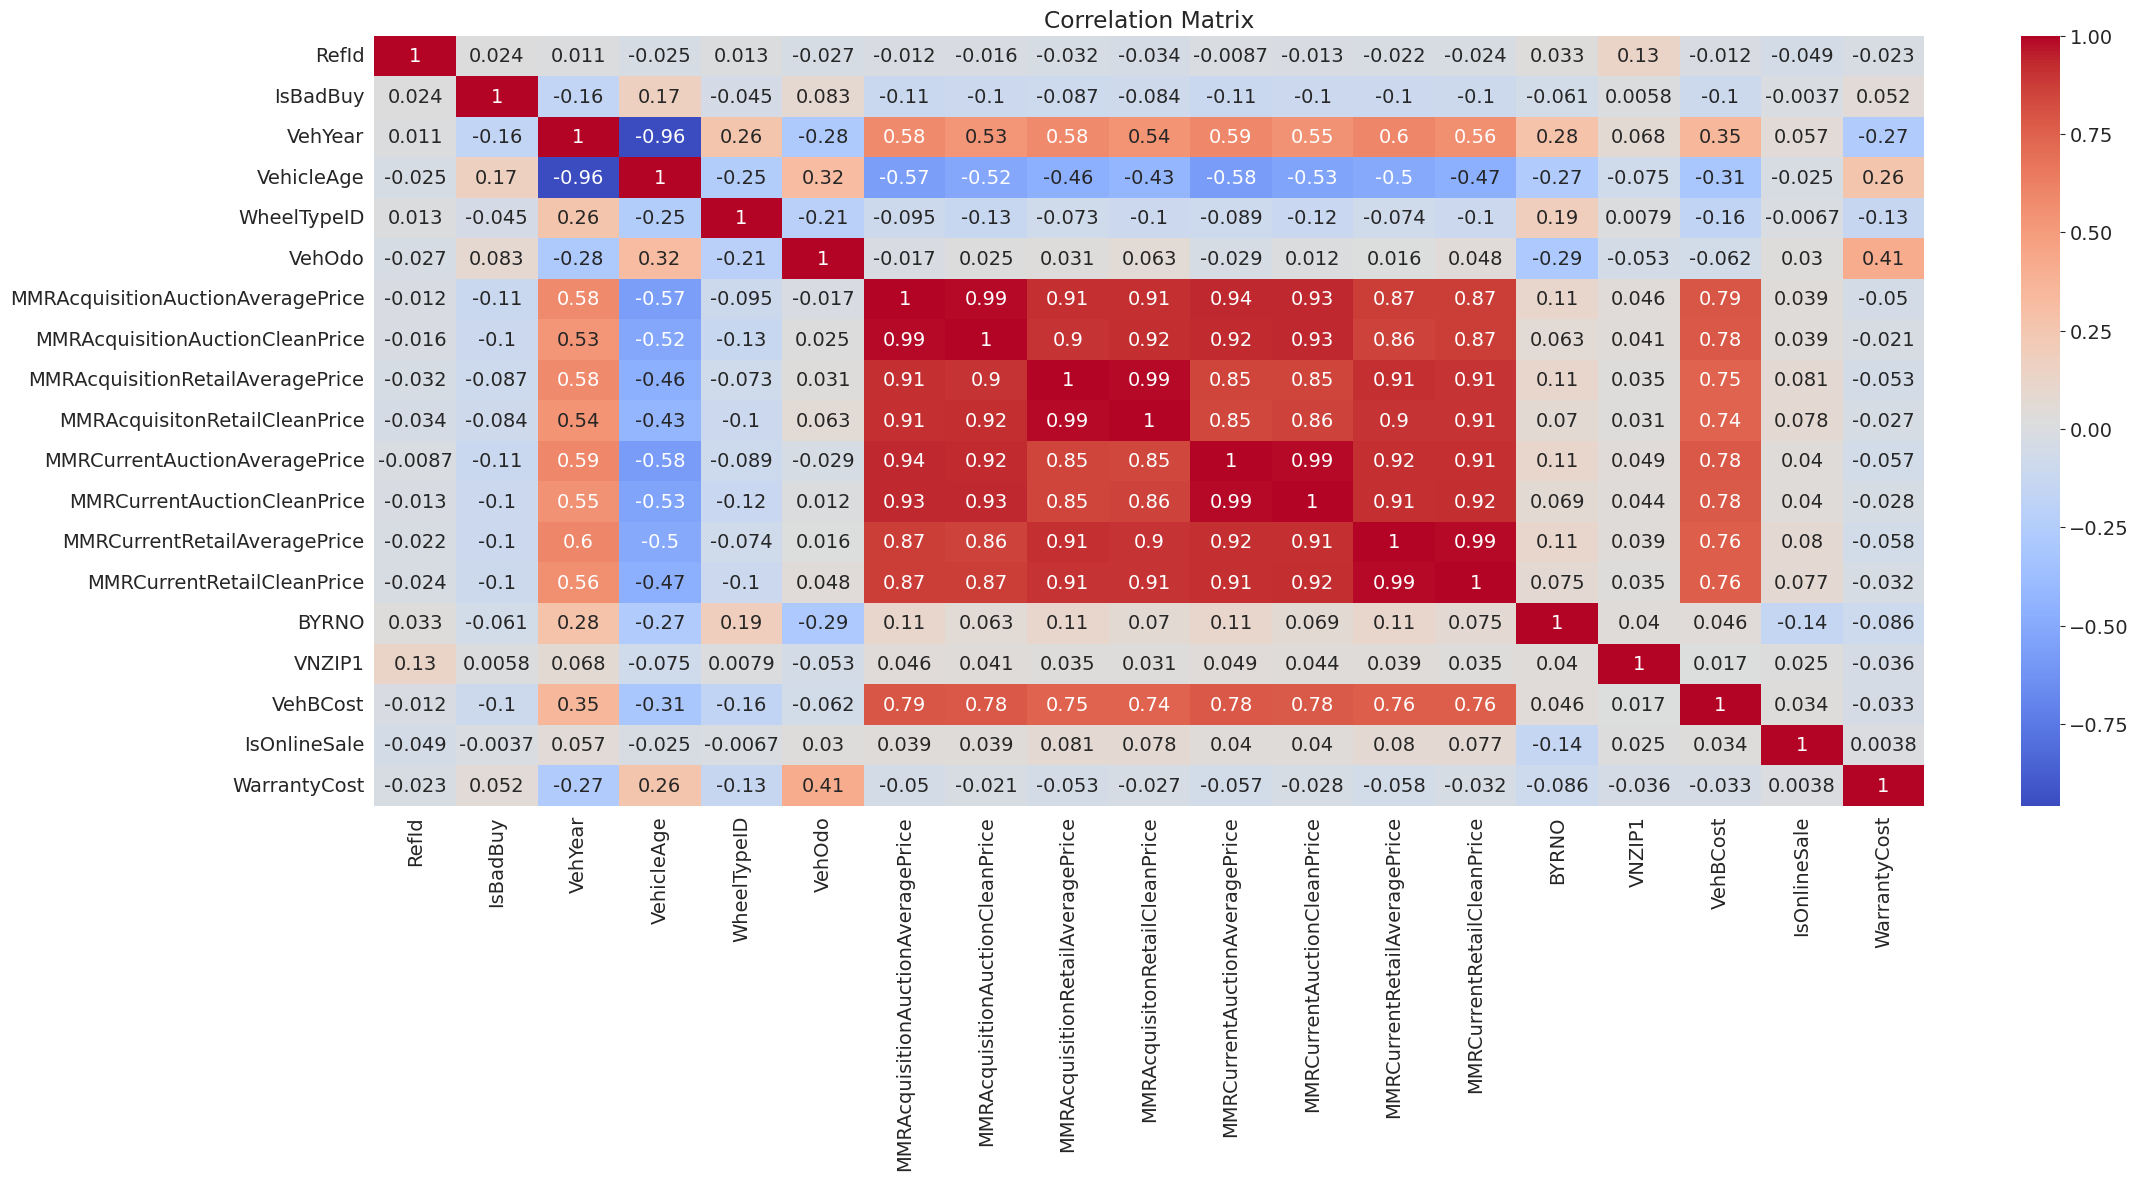

In [ ]:
plt.figure(figsize=(25, 10))
sns.heatmap(train_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix');

We are going to eliminate the columns with highly correlation value. 

In [ ]:
drop_cols_2 = ['MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailCleanPrice', 'VehYear']

In [ ]:
drop_columns(train_df, drop_cols_2)
drop_columns(test_df, drop_cols_2)
drop_columns(val_df, drop_cols_2)

In [ ]:
train_df

,RefId,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
9093,9102,0,2/23/2009,MANHEIM,2,FORD,FREESTYLE FWD V6 3.0,SEL,4D CUV 3.0L SEL,GREY,AUTO,1.0,Alloy,72485,AMERICAN,CROSSOVER,FORD,11450.0,12866.0,11778.0,13220.0,17675,27542,NC,8000.0,0,1506
13320,13330,0,2/3/2009,MANHEIM,5,GMC,ENVOY 4WD 6C 4.2L I6,SLE,4D UTILITY 4.2L,WHITE,AUTO,1.0,Alloy,80338,AMERICAN,MEDIUM SUV,GM,6590.0,7617.0,8340.0,9507.0,20740,21075,MD,7195.0,0,2152
29596,29617,0,2/26/2010,OTHER,2,DODGE,CALIBER,SE,4D WAGON,WHITE,AUTO,1.0,Alloy,51904,AMERICAN,MEDIUM,CHRYSLER,7774.0,10852.0,7901.0,11284.0,99761,74135,OK,7300.0,0,754
45118,45142,0,4/23/2009,OTHER,5,CHEVROLET,IMPALA 3.4L V6 SFI,Bas,4D SEDAN,WHITE,AUTO,2.0,Covers,77375,AMERICAN,LARGE,GM,3643.0,4434.0,3643.0,4434.0,3453,80229,CO,5655.0,0,1974
2949,2952,0,6/2/2010,OTHER,4,HYUNDAI,SONATA 4C,GLS,4D SEDAN GLS,SILVER,AUTO,1.0,Alloy,62031,OTHER ASIAN,MEDIUM,OTHER,6584.0,10231.0,5989.0,9257.0,8172,35004,AL,7900.0,0,728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,37217,1,6/8/2010,MANHEIM,3,CHRYSLER,SEBRING V6,Bas,4D SEDAN,BLUE,AUTO,2.0,Covers,67452,AMERICAN,MEDIUM,CHRYSLER,7471.0,10916.0,7612.0,10763.0,99750,46803,IN,8300.0,0,1118
6265,6272,0,4/29/2010,MANHEIM,4,KIA,SPECTRA,EX,4D SEDAN,SILVER,AUTO,1.0,Alloy,67182,OTHER ASIAN,MEDIUM,OTHER,5768.0,9019.0,4194.0,7125.0,18881,30272,GA,7045.0,0,533
54886,54914,0,7/9/2010,OTHER,4,CHEVROLET,MALIBU 4C,LT,4D SEDAN LT,SILVER,AUTO,1.0,Alloy,89342,AMERICAN,MEDIUM,GM,7162.0,10348.0,6736.0,10068.0,99750,73108,OK,6700.0,0,1113
860,862,0,9/29/2009,ADESA,3,PONTIAC,G6 V6 3.5L V6 SFI,Bas,4D SEDAN,RED,AUTO,1.0,Alloy,78991,AMERICAN,MEDIUM,GM,7091.0,8158.0,7148.0,10401.0,99740,50111,IA,7295.0,0,1272


### Charts grouped by categories

We are going to create a function to plot the categorial variables labeled with the 'isBadBuy' column to see possible patterns, anomalies and important values that could affect our prediction. This plot function idea was taken from this kaggle notebook [3] (https://www.kaggle.com/code/iamamir/used-cars-purchase/notebook)

In [ ]:
def bar_plot_function (df, col, m, n, title):
    fig, ax = plt.subplots(nrows=n,ncols=m,figsize=(10,5))
    freq = pd.crosstab(index=df[col], columns=df['IsBadBuy'], normalize='index')
    freq.plot(kind='bar',ax=ax[0],legend=False,figsize=(20,6),fontsize=16);
    count_plot = pd.crosstab(index=df[col], columns=df['IsBadBuy'])   
    count_plot.plot(kind='bar',ax=ax[1],legend=False,figsize=(20,6),fontsize=16);
    
    
    ax[0].set_title(title, fontsize=20)
    ax[0].set_xlabel(col, fontsize=15)
    ax[0].set_ylabel('Frequency', fontsize=15)
    ax[0].legend(labels=['No','Yes'], title= 'Bad buy')
    
    ax[1].set_title(title, fontsize=20)
    ax[1].set_xlabel(col, fontsize=15)
    ax[1].set_ylabel('Count', fontsize=15)
    ax[1].legend(labels=['No','Yes'], title= 'Bad buy')
    fig.tight_layout();  

From the chart above we can see that cars from the Adesa Auction have higher percentage of being a bad buy car than others auctions but not in a wide margin. Also we can see that the Manheim auction hold the most records from our dataset.


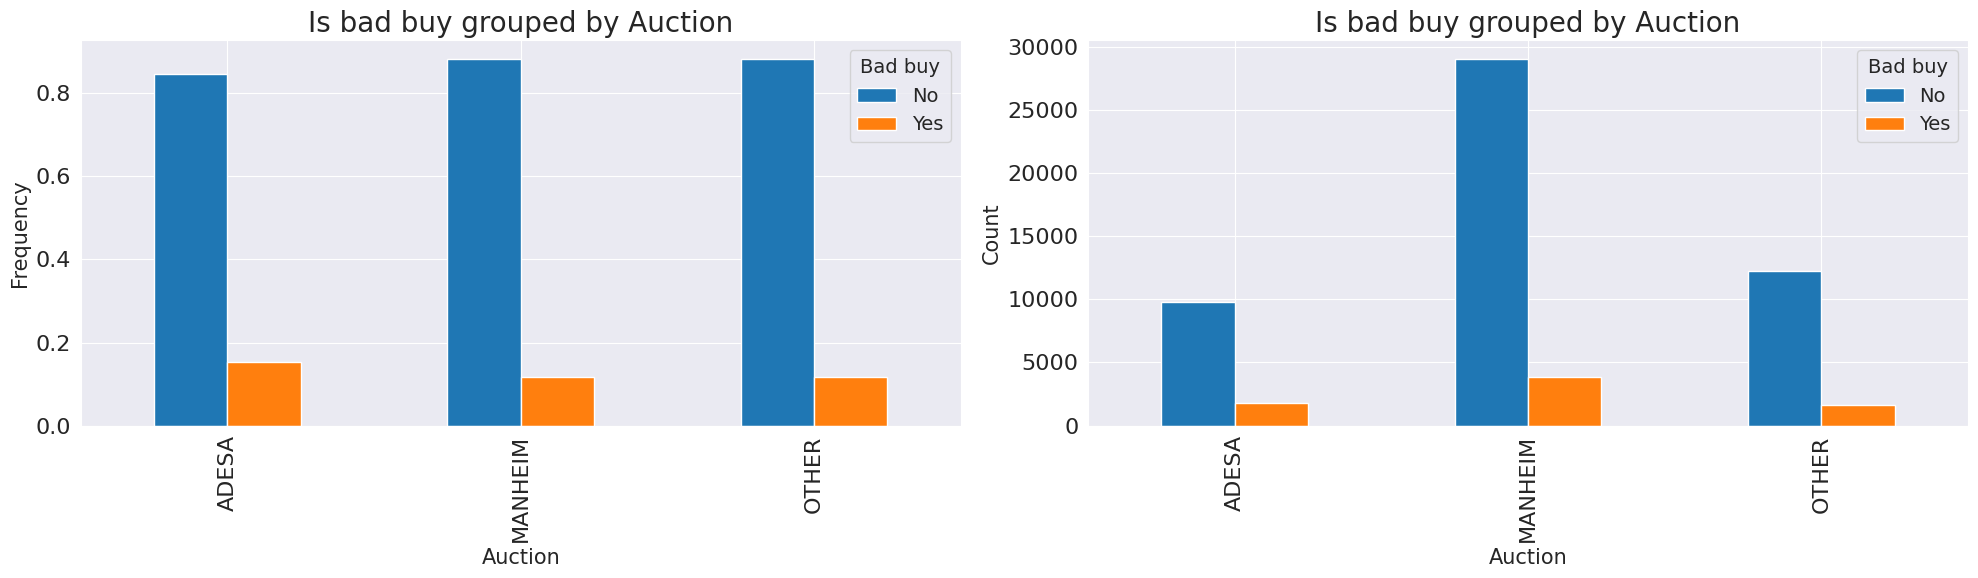

In [ ]:
print("From the chart above we can see that cars from the Adesa Auction have higher percentage of being a bad buy car than others auctions but not in a wide margin. Also we can see that the Manheim auction hold the most records from our dataset.")
bar_plot_function(train_df, 'Auction', 2, 1, 'Is bad buy grouped by Auction')

We can see from the chart above that the older the vehicle the higher the percentage of being a bad buy, as it was expected. Also, we can see that 3 and 4 years old cars are the most common from this dataset.


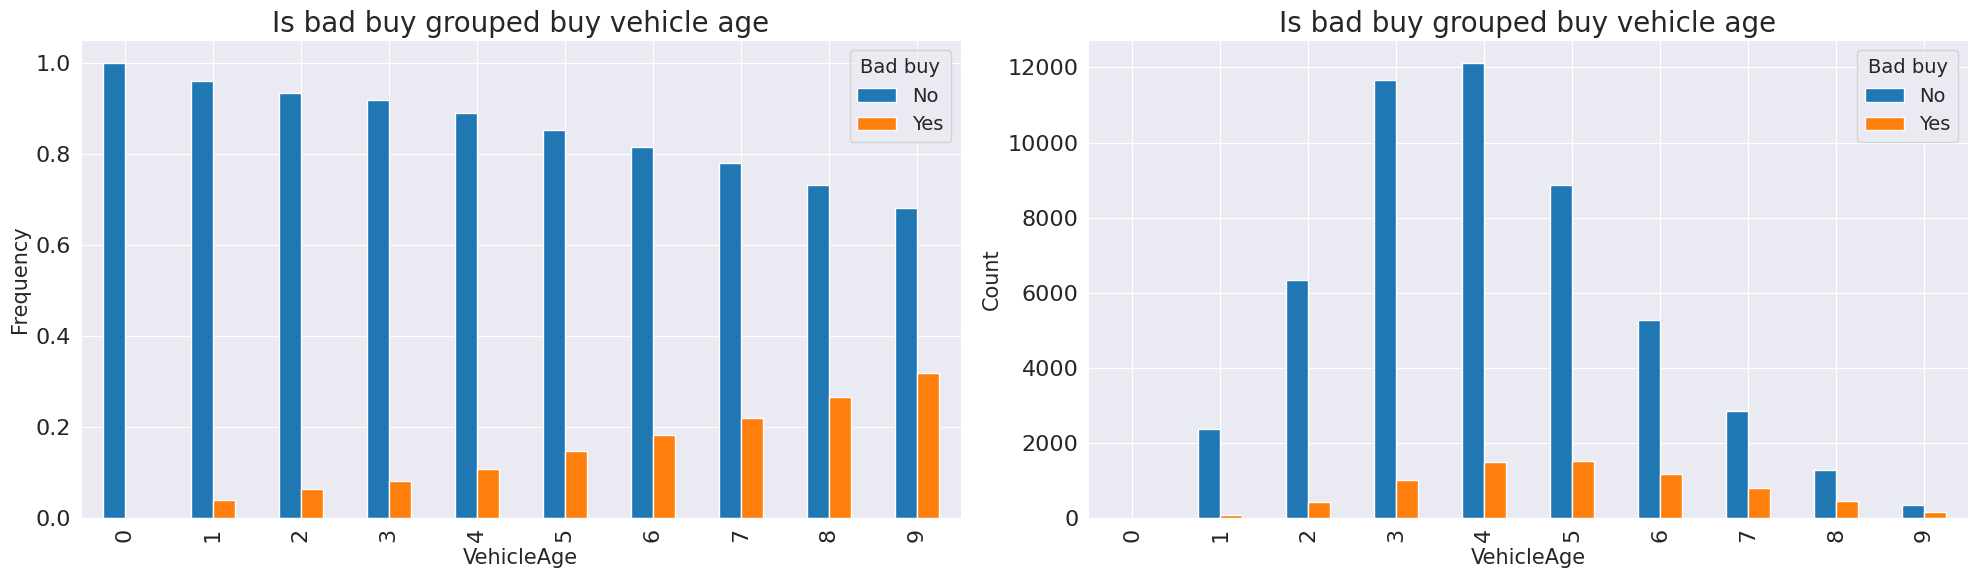

In [ ]:
print("We can see from the chart above that the older the vehicle the higher the percentage of being a bad buy, as it was expected. Also, we can see that 3 and 4 years old cars are the most common from this dataset.")
bar_plot_function(train_df, 'VehicleAge', 2, 1, 'Is bad buy grouped buy vehicle age')

From the chart above we can see that car brands like Infiniti, Lexus, Mini and Plymouth have a high percentage of being a bad buy, this maybe could be because we do not get too many records from this brands and the results could be bias.


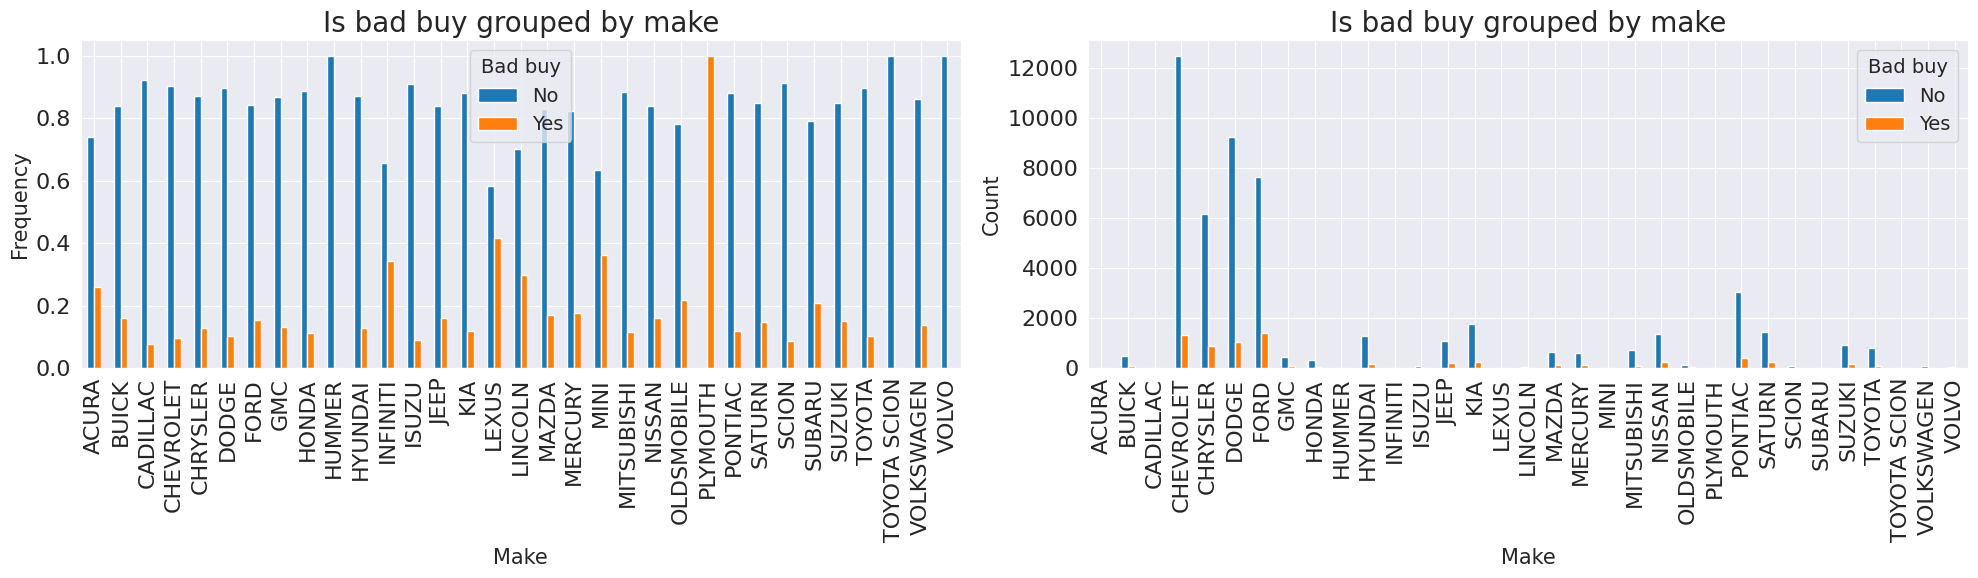

In [ ]:
print("From the chart above we can see that car brands like Infiniti, Lexus, Mini and Plymouth have a high percentage of being a bad buy, this maybe could be because we do not get too many records from this brands and the results could be bias.")
bar_plot_function(train_df, 'Make', 2, 1, 'Is bad buy grouped by make')

We can see from this chart that most of the cars are silver, white, blue, black and finally grey. The percentage of bad buy do not seems to be affected by the color, as it was expected.


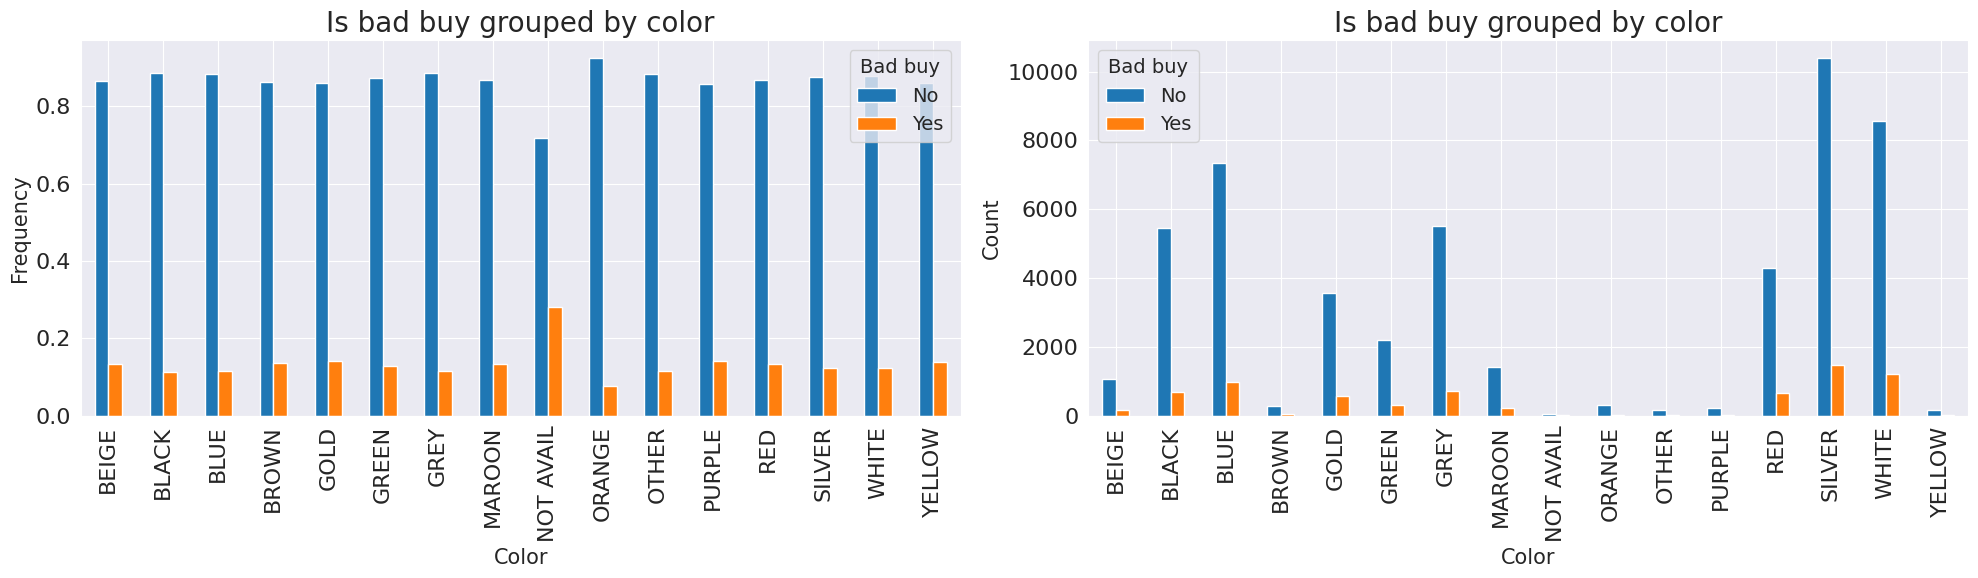

In [ ]:
print("We can see from this chart that most of the cars are silver, white, blue, black and finally grey. The percentage of bad buy do not seems to be affected by the color, as it was expected.")
bar_plot_function(train_df, 'Color', 2, 1, 'Is bad buy grouped by color')

We can see from this chart that most of the cars have automatic transmission. Also the percentage of bad buy is almost the same between auto and manual cars.


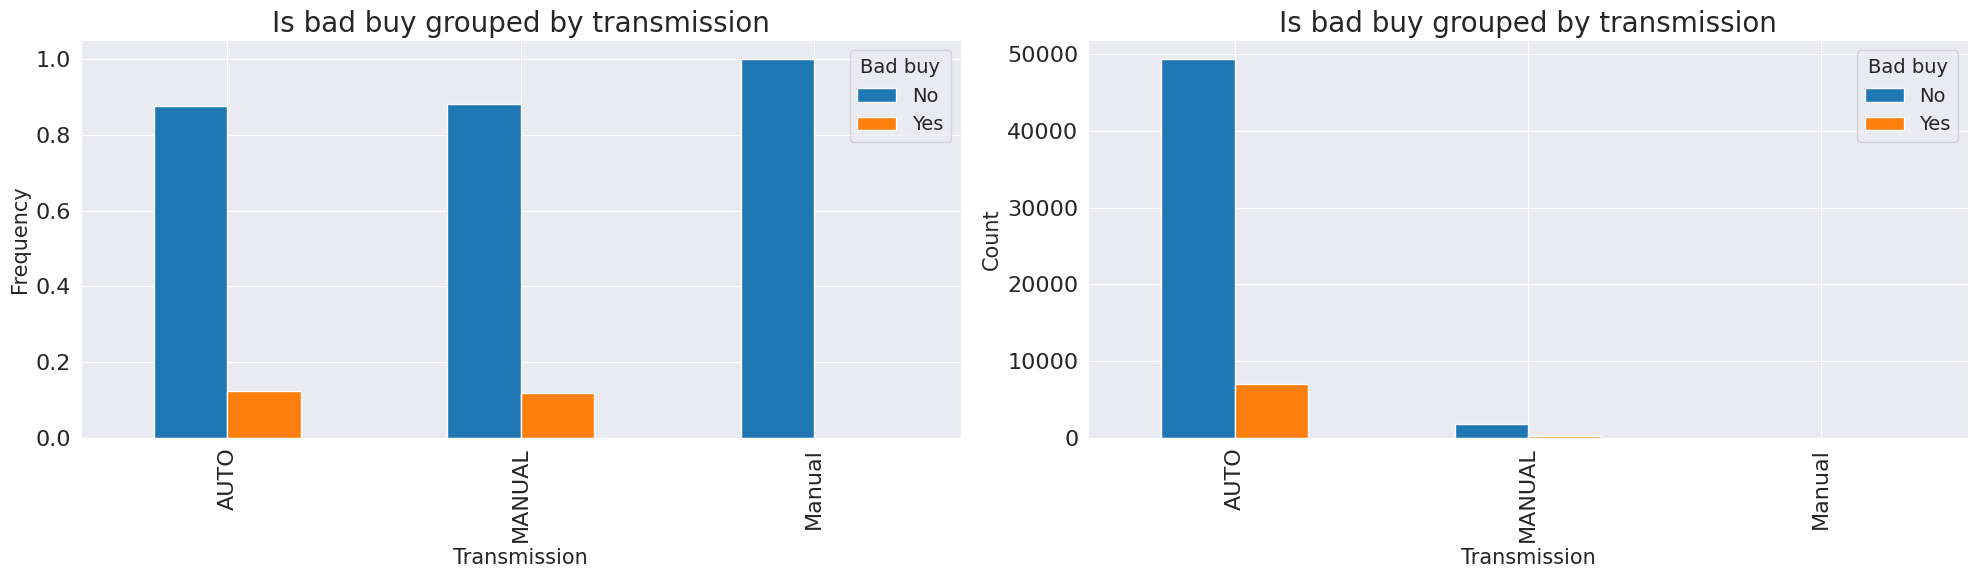

In [ ]:
print("We can see from this chart that most of the cars have automatic transmission. Also the percentage of bad buy is almost the same between auto and manual cars.")
bar_plot_function(train_df, 'Transmission', 2, 1, 'Is bad buy grouped by transmission')

In [ ]:
print("We can see from this chart that 1 year old cars have a really low percentage of being a bad buy and 9 years old have a percetage of 31% of being a bad buy in average. Also it is important to remark that these two vairables follows up a lineal relationship.")
age_grouped = pd.DataFrame(train_df.groupby('VehicleAge')['IsBadBuy'].mean().reset_index())
fig= px.line(age_grouped, x='VehicleAge', y='IsBadBuy', title='Percentage of bad buy vs vehicle age')
fig.show()

We can see from this chart that 1 year old cars have a really low percentage of being a bad buy and 9 years old have a percetage of 31% of being a bad buy in average. Also it is important to remark that these two vairables follows up a lineal relationship.


In [ ]:
print("From this histogram we can see that most of the cars are in the 60k to 80k mileage.")
fig = px.histogram(train_df, x='VehOdo', color='IsBadBuy', title='Odometer mileage histogram', nbins=100)
fig.show()

From this histogram we can see that most of the cars are in the 60k to 80k mileage.


In [ ]:
print("We can see from this histogram that our records are in the 5200 to 8200 range of cost.")
fig = px.histogram(train_df, x='VehBCost', color='IsBadBuy', title='Vehicles cost histogram', nbins=100)
fig.show()

We can see from this histogram that our records are in the 5200 to 8200 range of cost.


We can see from this chart that there is not a significant impact of cars being a particular size and affecting the bad buy percentage. Also, we can see that most of the records are from Medium size cars.


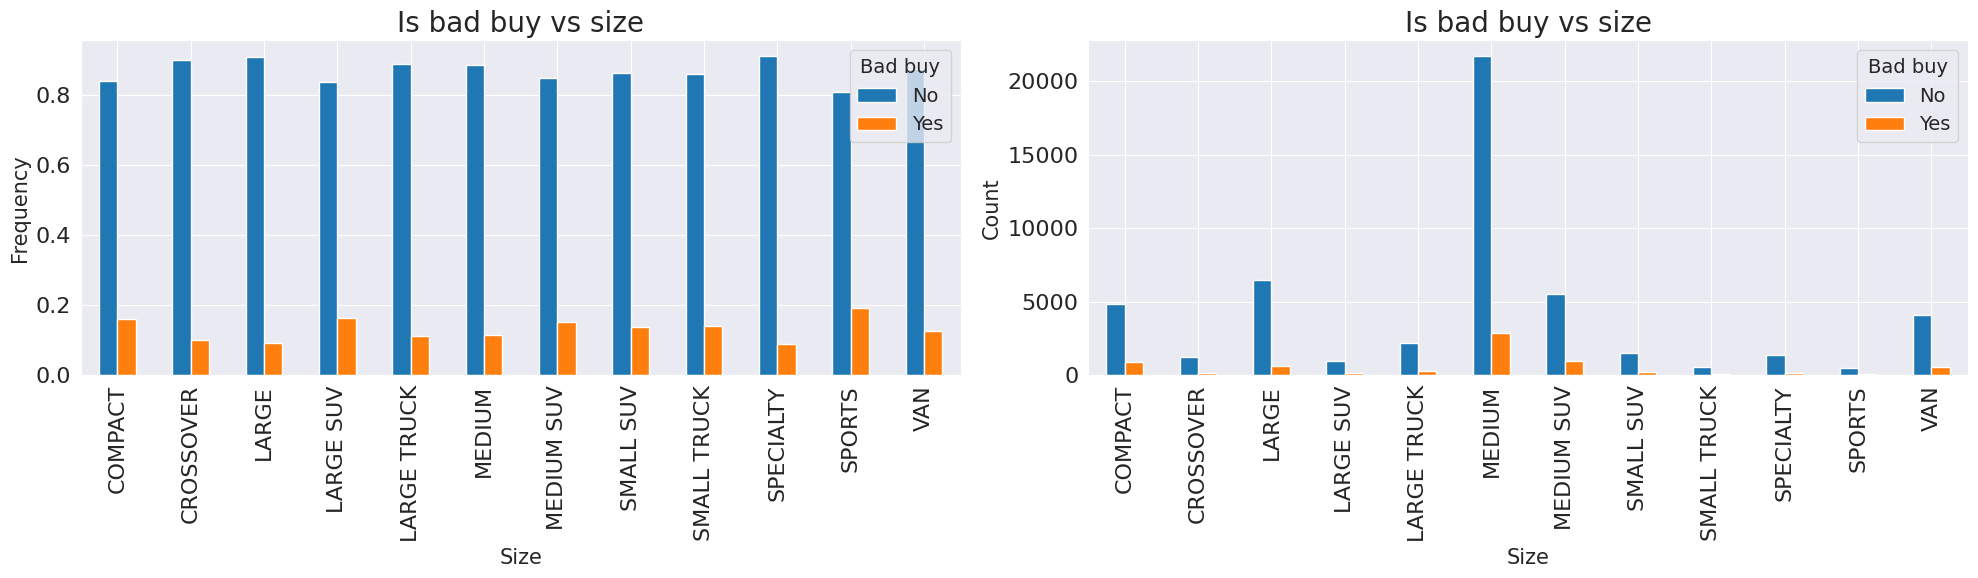

In [ ]:
print("We can see from this chart that there is not a significant impact of cars being a particular size and affecting the bad buy percentage. Also, we can see that most of the records are from Medium size cars.")
bar_plot_function(train_df, 'Size', 2, 1, 'Is bad buy vs size')

We can see from this chart that there is not significant change in the percentage of bad buy and the nationality of the car. Also we can see that most of the records are American brand.


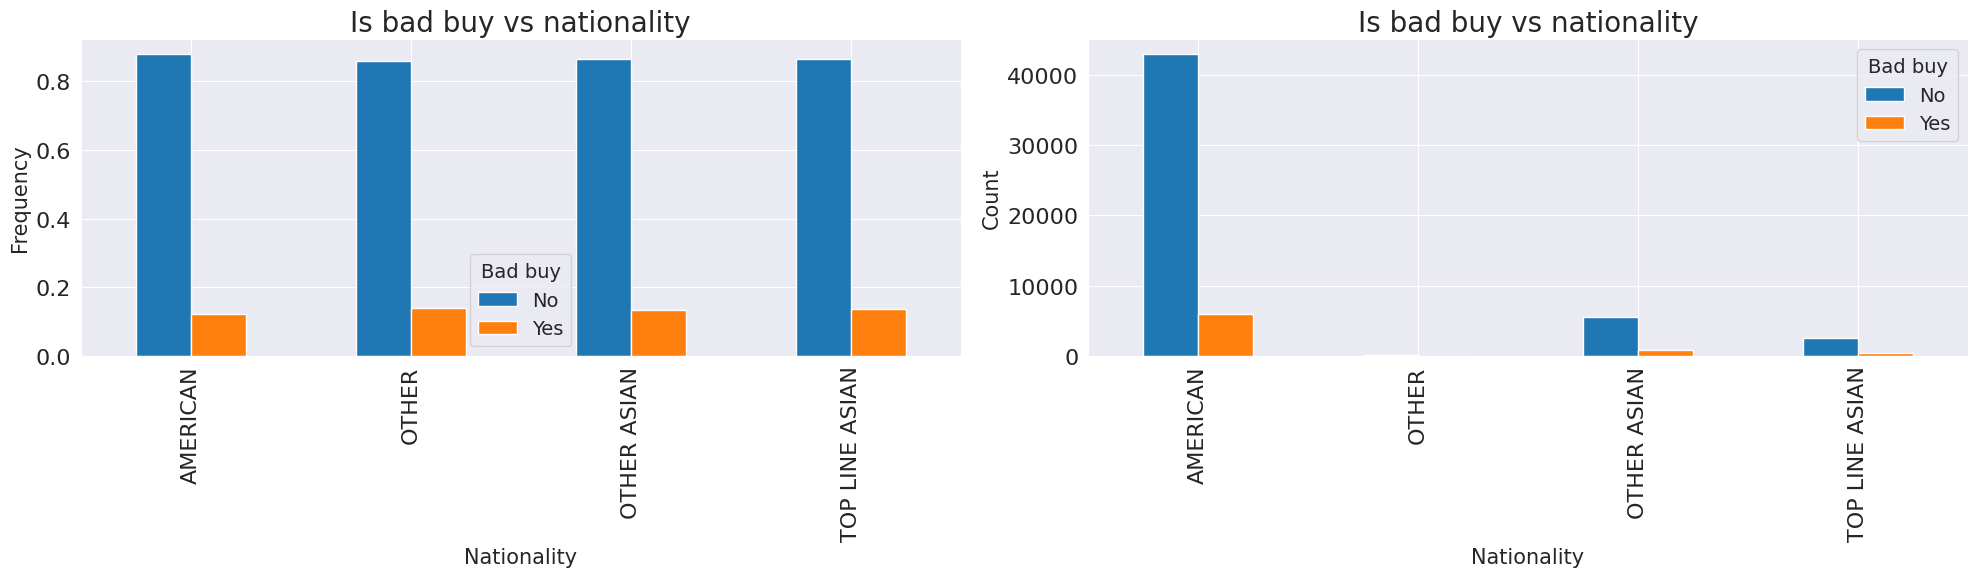

In [ ]:
print("We can see from this chart that there is not significant change in the percentage of bad buy and the nationality of the car. Also we can see that most of the records are American brand.")
bar_plot_function(train_df, 'Nationality', 2, 1, 'Is bad buy vs nationality')

## Feature engineering

In this section we are going to eliminate some features that are not important for our model and also we are going to add some new features that could improve our model. We are going to test if this features improve our model. Also we are going to impute numerical and categorical features, scale numerical features and encode categorical features.

In [ ]:
print('Lets also drop columns with too many different values and the IDs columns')
drop_cols_3 = ['RefId', 'Model', 'Trim', 'SubModel', 'Color', 'WheelTypeID', 'BYRNO', 'VNZIP1']

Lets also drop columns with too many different values and the IDs columns


In [ ]:
drop_columns(train_df, drop_cols_3)
drop_columns(test_df, drop_cols_3)
drop_columns(val_df, drop_cols_3)

In [ ]:
train_df['VehicleAge'].replace(0, 1, inplace=True)
test_df['VehicleAge'].replace(0, 1, inplace=True)
val_df['VehicleAge'].replace(0, 1, inplace=True)

In [ ]:
train_df['CostOdoRatio'] = train_df['VehBCost'] / train_df['VehOdo'] *1000
test_df['CostOdoRatio'] = test_df['VehBCost'] / test_df['VehOdo'] *1000
val_df['CostOdoRatio'] = val_df['VehBCost'] / val_df['VehOdo'] *1000

In [ ]:
train_df['CostYearRatio'] = train_df['VehBCost'] / train_df['VehicleAge']
test_df['CostYearRatio'] = test_df['VehBCost'] / test_df['VehicleAge']
val_df['CostYearRatio'] = val_df['VehBCost'] / val_df['VehicleAge']

In [ ]:
train_df['CostWarrantyRatio'] = train_df['VehBCost'] / train_df['WarrantyCost']
test_df['CostWarrantyRatio'] = test_df['VehBCost'] / test_df['WarrantyCost']
val_df['CostWarrantyRatio'] = val_df['VehBCost'] / val_df['WarrantyCost']

In [ ]:
train_df

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,CostWarrantyRatio
0,0,12/7/2009,ADESA,3,MAZDA,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,11636.0,7451.0,11597.0,FL,7100.0,0,1113,6.379155
1,0,12/7/2009,ADESA,5,DODGE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,10897.0,7456.0,11374.0,FL,7600.0,0,1053,7.217474
2,0,12/7/2009,ADESA,4,DODGE,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,6943.0,4035.0,7146.0,FL,4900.0,0,1389,3.527718
3,0,12/7/2009,ADESA,5,DODGE,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,4658.0,1844.0,4375.0,FL,4100.0,0,630,6.507937
4,0,12/7/2009,ADESA,4,FORD,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,7723.0,3247.0,6739.0,FL,4000.0,0,1020,3.921569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,12/2/2009,ADESA,8,MERCURY,AUTO,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2656.0,2190.0,4836.0,GA,4200.0,0,993,4.229607
72979,0,12/2/2009,ADESA,2,CHEVROLET,AUTO,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7431.0,6785.0,10151.0,GA,6200.0,0,1038,5.973025
72980,0,12/2/2009,ADESA,4,JEEP,AUTO,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9729.0,8375.0,11831.0,GA,8200.0,0,1893,4.331749
72981,0,12/2/2009,ADESA,3,CHEVROLET,AUTO,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7434.0,6590.0,10099.0,GA,7000.0,0,1974,3.546099


<ipython-input-57-a995e24c86af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), cmap='coolwarm', annot=True)


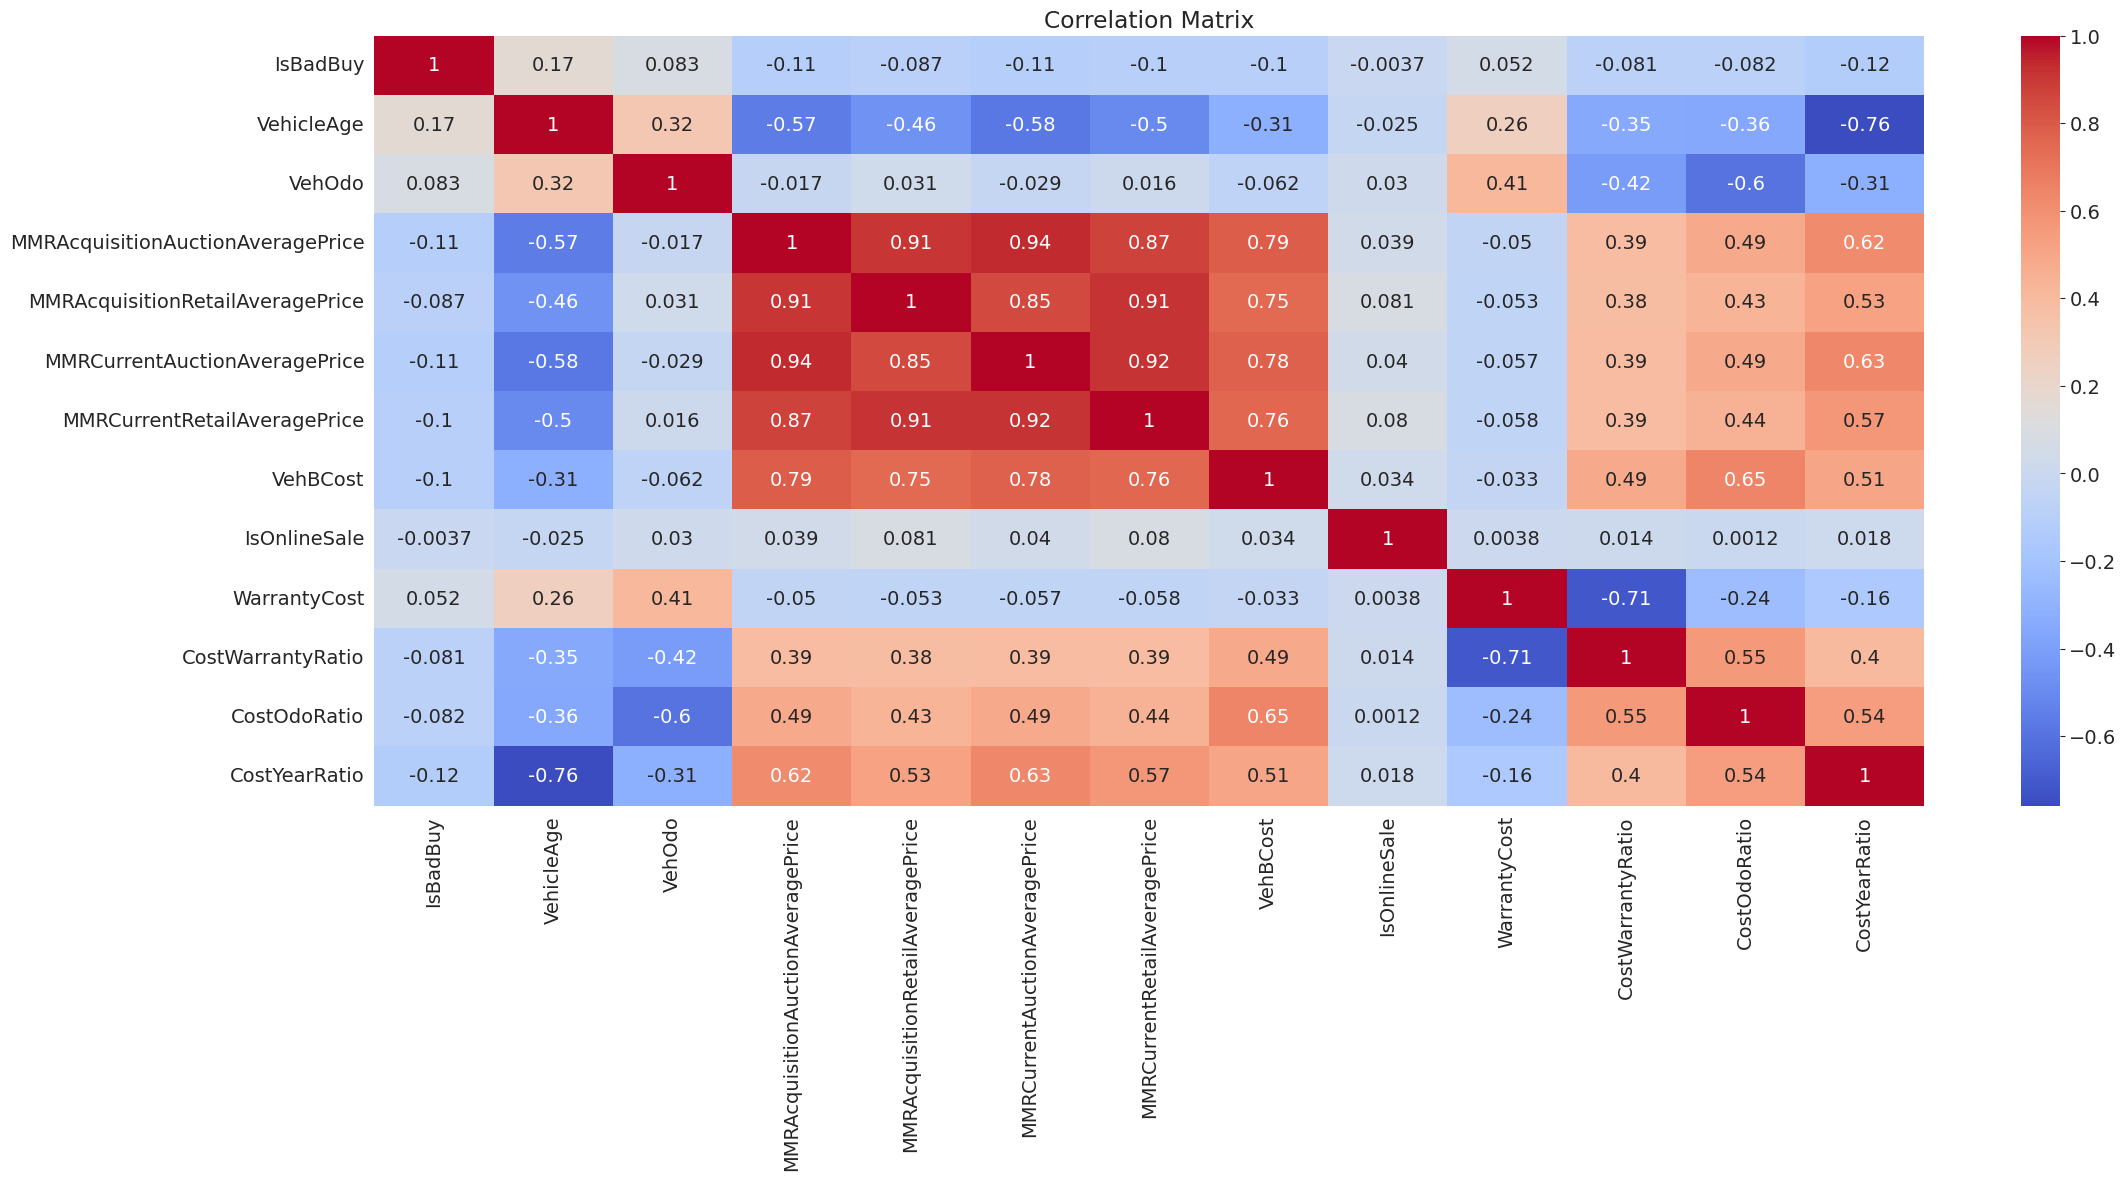

In [ ]:
plt.figure(figsize=(25, 10))
sns.heatmap(train_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix');

In [ ]:
train_df.columns

Index(['IsBadBuy', 'PurchDate', 'Auction', 'VehicleAge', 'Make',
       'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentRetailAveragePrice', 'PRIMEUNIT', 'AUCGUART', 'VNST',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'CostOdoRatio',
       'CostYearRatio', 'CostWarrantyRatio'],
      dtype='object')

In [ ]:
input_cols = ['Auction', 'VehicleAge', 'Make',
       'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentRetailAveragePrice', 'VNST', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost', 'CostOdoRatio', 'CostYearRatio', 'CostWarrantyRatio']
target_col = ['IsBadBuy']

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
train_inputs.isna().sum()

Auction                                 0
VehicleAge                              0
Make                                    0
Transmission                            7
WheelType                            2530
VehOdo                                  0
Nationality                             4
Size                                    4
TopThreeAmericanName                    4
MMRAcquisitionAuctionAveragePrice      13
MMRAcquisitionRetailAveragePrice       13
MMRCurrentAuctionAveragePrice         257
MMRCurrentRetailAveragePrice          257
VNST                                    0
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                            0
CostOdoRatio                            0
CostYearRatio                           0
CostWarrantyRatio                       0
dtype: int64

In [ ]:
train_inputs['Transmission'].replace("Manual", "MANUAL", inplace=True)
test_inputs['Transmission'].replace("Manual", "MANUAL", inplace=True)
val_inputs['Transmission'].replace("Manual", "MANUAL", inplace=True)

### Imputing features

For the numerical features we are going to use the median and we are going to fill the missing categorical values with the word 'unknown'.

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
numeric_cols

['VehicleAge',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentRetailAveragePrice',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'CostOdoRatio',
 'CostYearRatio',
 'CostWarrantyRatio']

In [ ]:
categorical_cols

['Auction',
 'Make',
 'Transmission',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'VNST']

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'median').fit(train_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])

In [ ]:
imputer_cat = SimpleImputer(strategy = 'constant', fill_value= 'Unknown').fit(train_df[categorical_cols])

In [ ]:
train_inputs[categorical_cols] = imputer_cat.transform(train_inputs[categorical_cols])
test_inputs[categorical_cols] = imputer_cat.transform(test_inputs[categorical_cols])
val_inputs[categorical_cols] = imputer_cat.transform(val_inputs[categorical_cols])

### Scaling numeric features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [ ]:
train_inputs

,Auction,VehicleAge,Make,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,CostOdoRatio,CostYearRatio,CostWarrantyRatio
9093,MANHEIM,0.125,FORD,AUTO,Alloy,0.610143,AMERICAN,CROSSOVER,FORD,0.320531,0.329222,0.329713,0.338280,NC,0.206245,0.0,0.148380,0.028724,0.111418,0.103863
13320,MANHEIM,0.500,GMC,AUTO,Alloy,0.680960,AMERICAN,MEDIUM SUV,GM,0.184480,0.194908,0.233470,0.243270,MD,0.185489,0.0,0.240193,0.023308,0.040080,0.065366
29596,OTHER,0.125,DODGE,AUTO,Alloy,0.424548,AMERICAN,MEDIUM,CHRYSLER,0.217625,0.277687,0.221180,0.288741,OK,0.188196,0.0,0.041501,0.036605,0.101668,0.189309
45118,OTHER,0.500,CHEVROLET,AUTO,Covers,0.654240,AMERICAN,LARGE,GM,0.101982,0.113460,0.101982,0.113460,CO,0.145782,0.0,0.214895,0.019020,0.031501,0.056006
2949,OTHER,0.375,HYUNDAI,AUTO,Alloy,0.515871,OTHER ASIAN,MEDIUM,OTHER,0.184312,0.261796,0.167656,0.236873,AL,0.203666,0.0,0.037806,0.033146,0.055011,0.212187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,MANHEIM,0.250,CHRYSLER,AUTO,Covers,0.564757,AMERICAN,MEDIUM,CHRYSLER,0.209143,0.279324,0.213090,0.275409,IN,0.213980,0.0,0.093235,0.032025,0.077063,0.145160
6265,MANHEIM,0.375,KIA,AUTO,Alloy,0.562322,OTHER ASIAN,MEDIUM,OTHER,0.161469,0.230783,0.117407,0.182318,GA,0.181621,0.0,0.010091,0.027292,0.049057,0.258453
54886,OTHER,0.375,CHEVROLET,AUTO,Alloy,0.762156,AMERICAN,MEDIUM,GM,0.200493,0.264790,0.188567,0.257625,OK,0.172726,0.0,0.092524,0.019517,0.046654,0.117702
860,ADESA,0.250,PONTIAC,AUTO,Alloy,0.668813,AMERICAN,MEDIUM,GM,0.198505,0.208751,0.200101,0.266146,IA,0.188067,0.0,0.115122,0.024035,0.067731,0.112134


### Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_df[categorical_cols])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

<ipython-input-43-dc9aef5d64f7>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-43-dc9aef5d64f7>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-43-dc9aef5d64f7>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

## Training the models

In this section we are going to train different models and choose the model that perform better for this dataset. We use this methods:

- Logistic Regression
- Decision Tree
- Gradient Boosting
- Random Forest

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
model = LogisticRegression(random_state = 42)

model.fit(X_train, train_targets)

train_preds = model.predict(X_train)

train_acurracy = accuracy_score(train_targets, train_preds)

val_accuracy = model.score(X_val, val_targets)

print('Training acurracy score:', train_acurracy)
print('Validation accuracy score: ', val_accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training acurracy score: 0.894443873531326
Validation accuracy score:  0.8976502020963212


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state = 42)

model.fit(X_train, train_targets)

train_preds = model.predict(X_train)

train_accuracy = accuracy_score(train_targets, train_preds)

val_accuracy = model.score(X_val, val_targets)

print('Training accuracy score:', train_accuracy)
print('Validation accuracy score:', val_accuracy)

Training accuracy score: 0.8792861302367005
Validation accuracy score: 0.8830581626361581


In [ ]:
train_targets.value_counts() / len(train_targets)

IsBadBuy
0           0.876186
1           0.123814
dtype: float64

In [ ]:
val_targets.value_counts() / len(val_targets)

IsBadBuy
0           0.880318
1           0.119682
dtype: float64

### Gradient Boosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(n_jobs=-1, random_state=42)

model.fit(X_train, train_targets)

train_preds = model.predict(X_train)

training_score = accuracy_score(train_targets, train_preds)

val_score = model.score(X_val, val_targets)

print('Training accuracy score:', training_score)
print('Validation accuracy score:', val_score)

Training accuracy score: 0.9129757133559415
Validation accuracy score: 0.9006645201068713


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

model.fit(X_train, train_targets)

train_preds = model.predict(X_train)

training_accuracy = accuracy_score(train_targets, train_preds)

val_accuracy = model.score(X_val, val_targets)

print('Training accuracy:', training_accuracy)
print('Validation accuracy:', val_accuracy)

<ipython-input-73-24cc5dc451c2>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training accuracy: 0.9989209742061453
Validation accuracy: 0.8986778105090087


## Tunning the best model (Random Forest)

The model that got the best results possible was the random forest. For the hyperparameter tunning we are goint to use the GridSearchCV technique, for more information about this technique we can consult this page [4] (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
model = RandomForestClassifier(n_jobs=-1,n_estimators=140, max_depth=40, min_samples_split=4, random_state=42)

model.fit(X_train, train_targets)

train_preds = model.predict(X_train)

training_accuracy = accuracy_score(train_targets, train_preds)

val_accuracy = model.score(X_val, val_targets)

print('Training accuracy:', training_accuracy)
print('Validation accuracy:', val_accuracy)

<ipython-input-48-a79fc15afeb8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, train_targets)


Training accuracy: 0.9827698420854314
Validation accuracy: 0.8962115503185586


In [ ]:
confusion_matrix(train_preds, train_targets, normalize='true')

array([[0.9807143, 0.0192857],
       [0.       , 1.       ]])

In [ ]:
val_preds = model.predict(X_val)
val_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
confusion_matrix(val_preds, val_targets, normalize='true')

array([[0.8970784 , 0.1029216 ],
       [0.14197531, 0.85802469]])

The correlation matrix above shows us the percentage of false positives and false negatives, false positive is when the model predict the car is a bad buy when in reality is not and false negative is when the model predict the car is a good buy when in fact is not. For the training predictions, we got 1.9% of false positives and 0 of false negatives. For the validation predictions we got 10.29% of false positives and 14.19% of false negatives. This percentages are good and can acceptable for our purpose.

Now, let´s see the most important features of our model. Surprisingly the features that we created in the feature engineering section are top 1, top 2 and top 5. So we did a good job in that section.

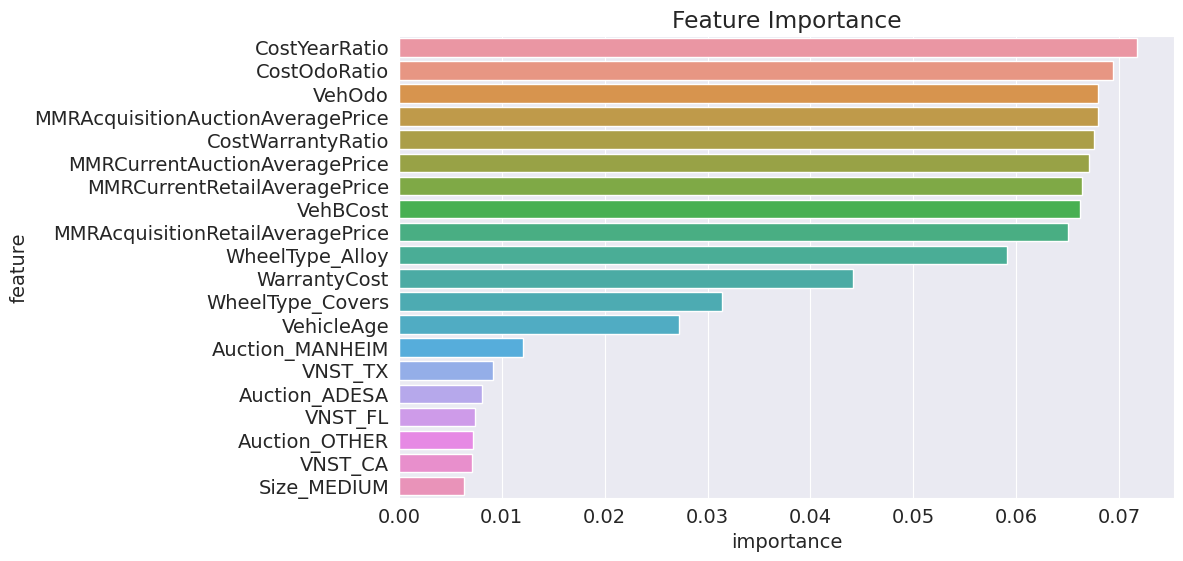

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(20), x='importance', y='feature');

In this section we select the best hyperparameters for our model. The GridSearchCV execute many iterations with all the ranges of hyperparameters we put and then he choose the combination that gives us the best score for our model.

In [ ]:
]from sklearn.model_selection import GridSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 160, num = 9)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 20, stop = 50, num = 4)]
# Min samples split
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)]


In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
              'min_samples_split' : min_samples_split
               }
print(param_grid)

{'n_estimators': [80, 90, 100, 110, 120, 130, 140, 150, 160], 'max_depth': [20, 30, 40, 50], 'min_samples_split': [1, 2, 3, 4, 5]}


In [ ]:
model = RandomForestClassifier()

In [ ]:
rf_Grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 2, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(X_train, train_targets)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
72 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_pa

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [20, 30, 40, 50],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [80, 90, 100, 110, 120, 130, 140, 150,
                                          160]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'max_depth': 40, 'min_samples_split': 4, 'n_estimators': 140}

## Submission

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
final_sub = pd.DataFrame({ 'RefId': test_df_copy['RefId'],
                       'IsBadBuy' : test_preds
    
})

In [ ]:
final_sub.to_csv("Submission_dontgetkicked.csv", index = False)

## References

[1] https://jovian.com/learn/machine-learning-with-python-zero-to-gbms

[2] https://www.kaggle.com/competitions/DontGetKicked

[3] (https://www.kaggle.com/code/iamamir/used-cars-purchase/notebook)

[4] (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).